# Crime Analytics in Seattle and San Francisco

Data Science at Scale assignment 6:
In this assignment, you will analyze criminal incident data from Seattle or San Francisco to visualize patterns and, if desired, contrast and compare patterns across the two cities.

You will produce a blog-post-style visual narrative consisting of a series of visualizations interspersed with sufficient descriptive text to make a convincing argument.

The assignment will be assessed by peer review. The rubric for assessment will include questions about the effectiveness and clarity of your argument, your use of visualization, and the completeness of your analysis. Reproducibility will also be considered, but will be evaluated subjectively -- peer reviewers will not be asked to recreate your results.


For this analysis, 2 months of real crime data for Summer 2014 in San Francisco and Seattle is accessed.

-------------------------------------------
I decided to use Python for this assignment.

In [1]:
YEAR = 2014
PERIOD = "summer"
TYPE = "incidents"
DATA_DIR = "data"
SF = "sanfrancisco"
SEATTLE = "seattle"

To do this analysis, Python's [pandas](http://pandas.pydata.org/) library will be used. It's a great library that helps to represent the data as **DataFrames** which makes subsequent analysis much easier.

2 DataFrames will be created:

* `sf`: contains San Francisco's crime data for Summer 2014.
* `seattle`: contains Seattle's crime data for Summer 2014.

In [2]:
# Load data into pandas DataFrames
import os
import pandas as pd

sf_filename = os.path.join(DATA_DIR, "%s_%s_%s_%d.csv" % (SF, TYPE, PERIOD, YEAR))
sf = pd.read_csv(sf_filename)
sf_nrows = sf.shape[0]
print ("Read SF data from %s yielded %d rows" % (sf_filename, sf_nrows))

seattle_filename = os.path.join(DATA_DIR, "%s_%s_%s_%d.csv" % (SEATTLE, TYPE, PERIOD, YEAR))
seattle = pd.read_csv(seattle_filename)
seattle_nrows = seattle.shape[0]
print ("Read Seattle data from %s yielded %d rows" % (seattle_filename, seattle_nrows))

assert sf_nrows == len(open(sf_filename).readlines()) - 1 != 0
assert seattle_nrows == len(open(seattle_filename).readlines()) - 1 != 0

Read SF data from data\sanfrancisco_incidents_summer_2014.csv yielded 28993 rows
Read Seattle data from data\seattle_incidents_summer_2014.csv yielded 32779 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Sampling some random data in `sf`:

In [3]:
sf.sample(n=5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
10071,140651157,NON-CRIMINAL,COURTESY REPORT,Friday,08/01/2014,12:00,MISSION,NONE,1700 Block of MISSION ST,-122.420222,37.769554,"(37.769554034555, -122.420222385251)",14065115768030
3081,140705817,MISSING PERSON,FOUND PERSON,Friday,08/22/2014,15:44,SOUTHERN,"ARREST, BOOKED",700 Block of MISSION ST,-122.403070,37.785269,"(37.7852686309087, -122.403070000847)",14070581775000
3153,140705265,ASSAULT,THREATS AGAINST LIFE,Friday,08/22/2014,12:30,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",14070526519057
23306,140511614,DRUG/NARCOTIC,POSSESSION OF HEROIN,Friday,06/20/2014,13:21,TENDERLOIN,"ARREST, BOOKED",LEAVENWORTH ST / MCALLISTER ST,-122.413679,37.780926,"(37.7809258336852, -122.413679376888)",14051161416100
30,146177741,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,22:00,RICHMOND,NONE,2500 Block of MCALLISTER ST,-122.453871,37.775582,"(37.7755820573955, -122.453870632501)",14617774106244


Sampling some random data in `seattle`:

In [4]:
seattle.sample(n=5)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
25001,1008999,2014201810,2305,0,THEFT-CARPROWL,2300,CAR PROWL,06/24/2014 01:12:00 AM,06/23/2014 09:30:00 PM,06/23/2014 11:50:00 PM,14XX BLOCK OF WESTERN AV,M,M3,8100.1011,-122.340670,47.607860,"(47.60786035, -122.340669905)",6,2014
19513,1037511,2014223585,5015,1,WARRARR-FELONY,5000,WARRANT ARREST,07/09/2014 10:04:00 PM,07/09/2014 10:04:00 PM,NaN,19XX BLOCK OF 4 AV S,O,O2,9300.3012,-122.329058,47.585074,"(47.585073699, -122.329058002)",7,2014
31777,57606,2014176434,2699,1,FRAUD-OTHER,2600,FRAUD,06/04/2014 11:24:00 AM,06/02/2014 12:00:00 PM,06/04/2014 11:00:00 AM,7XX BLOCK OF NW 73 ST,J,J2,2900.3013,-122.365016,47.681782,"(47.681781586, -122.365015662)",6,2014
14503,45231,2014241393,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,07/23/2014 04:42:00 PM,07/18/2014 08:00:00 PM,07/22/2014 10:00:00 AM,140XX BLOCK OF LAKE CITY WY NE,L,L1,100.4003,-122.292342,47.731028,"(47.731028434, -122.292342078)",7,2014
32337,994805,2014904567,2305,0,THEFT-CARPROWL,2300,CAR PROWL,06/02/2014 04:52:00 PM,06/02/2014 01:00:00 AM,06/02/2014 09:00:00 AM,51XX BLOCK OF S MORGAN ST,R,R3,11102.1007,-122.268522,47.544278,"(47.544277908, -122.268522136)",6,2014


It is clear that several columns aren't useful for analysis (like Offense Code, for example), and it is also notorious that the scheme between`sf` and `seattle` is different, so data preprocessing and normalization will be performed to carry out comparisons between the two cities.

## Data Preprocessing and Normalization

### San Francisco

Several columns in `sf` have data mapping to other columns in `seattle`, but its names are differently. Specifically:

* `X` in `sf` has a 1:1 relationship to `Longitude` in `seattle`.
* `Y` in `sf` has a 1:1 relationship to `Latitude` in `seattle`.
* `PdDistrict` in `sf` has a 1:1 relationship to `District/Sector` in `seattle`. To simplify, both will be named `District`.
* `Descript` in `sf` has a 1:1 relationship to `Summarized Offense Description` in `seattle`. To simplify,  both will be named `Description`.

In `sf` these columns will be renamed.
Maybe all these columns and data won't be used for analysis, however  they will normalized for use in a next release.

In [5]:
sf.rename(columns = {"X": "Longitude", "Y": "Latitude", "PdDistrict": "District", "Descript": "Description"}, 
          inplace=True)

As part of the standardization process, next activities will be executed:
* Generate a new column to indicate the city of origin of the data.
* Separate date and time data into new columns:
* Add 1 column being the `DayOfMonth`, another one the `Month` and a last one the `Year`.
* Add 1 column `TimeBin` to get an integer representation of the time which is easier to visualize and work with 

In [6]:
sf["City"] = pd.Series([SF]*sf.shape[0], index=sf.index)
sf["DayOfMonth"] = sf.Date.map(lambda x: int(x.split("/")[1]))
sf["Month"] = sf.Date.map(lambda x: int(x.split("/")[0]))
sf["Year"] = sf.Date.map(lambda x: int(x.split("/")[2]))

# Function that takes a Time as HH:MM and returns an int representing the hour
def time_bin(t, bin_size=30):
    hour, mins = t.split(":")
    return int(hour)
    
sf["TimeBin"] = sf.Time.map(time_bin)

With all new features, the columns that are not useful will be `drop`. Folllowing columns:

* `IncidntNum`: A SFPD internal ID which is not useful.
* `PdId`: Another SFPD internal ID.
* `Location`: This is just a combination of columns `X` and `Y` and is redundant.
* `Resolution`: While this tells an interesting story (how the case concluded), there is no such data in `seattle`, so it won't used.

In [7]:
sf.drop(["IncidntNum", "PdId", "Location", "Resolution"], axis=1, inplace=True, errors="ignore")

All done for `sf`. A new DataFrame `sf_normalized` will be created and have a specific order of the columns. This is because `seattle` has a completely different order, so both DataFrames will have the exact same schema so they can fit them into a single DataFrame ultimately.

In [8]:
# Reindex the DataFrame
columns_index = ["City", "DayOfMonth", "DayOfWeek", "Month", "Year", "Time", "TimeBin",
                    "Longitude", "Latitude", "Address", "District", 
                    "Category", "Description"
                   ]
sf_normalized = sf[columns_index]
sf_normalized.sample(n=5)

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
2853,sanfrancisco,23,Saturday,8,2014,03:41,3,-122.434757,37.785428,1700 Block of STEINER ST,NORTHERN,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION
21093,sanfrancisco,27,Friday,6,2014,17:00,17,-122.437402,37.751032,4200 Block of 24TH ST,MISSION,VEHICLE THEFT,STOLEN AUTOMOBILE
18984,sanfrancisco,3,Thursday,7,2014,21:40,21,-122.395892,37.757237,700 Block of MISSOURI ST,BAYVIEW,ASSAULT,INFLICT INJURY ON COHABITEE
4058,sanfrancisco,19,Tuesday,8,2014,13:21,13,-122.424062,37.765586,300 Block of GUERRERO ST,MISSION,DRUG/NARCOTIC,POSSESSION OF COCAINE FOR SALES
5900,sanfrancisco,13,Wednesday,8,2014,20:14,20,-122.403840,37.791270,0 Block of BELDEN ST,CENTRAL,SUSPICIOUS OCC,INVESTIGATIVE DETENTION


### Seattle

Same process for `seattle`. Dropping the following columns:

* `RMS CDW ID`: A SeattlePD internal ID, no useful.
* `General Offense Number`: A unique number for each incident. Seems to be a function of the date, but it isn't necessary.
* `Offense Code`: A unique number identifying each type of offense. This maps to `Offense Type` but is less expressive, so it's get rid of it.
* `Offense Code Extension`: Some ID, probably SeattlePD internal stuff.
* `Census Tract 2000`: Census information which is not relevant for the analysis.
* `Location`: This is just a combination of columns `Longitude` and `Latitude` and is redundant.

In [9]:
seattle_drop_columns = ["RMS CDW ID", 
                        "General Offense Number", 
                        "Offense Code", 
                        "Offense Code Extension", 
                        "Summary Offense Code",
                        "Census Tract 2000",
                        "Location"
                       ]
seattle.drop(seattle_drop_columns, axis=1, inplace=True, errors="ignore")

The columns which have a different name in `sf`:

* `Hundred Block Location` in `seattle` is similar to `Address` in `sf`.
* `Offense Type` in `seattle` is similar to `Category` in `sf`.
* `Summarized Offense Description` will be renamed to `Description` to make it simpler, like mentioned earlier.
* `District/Sector` will be named to `District` to make it simpler, like mentioned earlier.

In [10]:
seattle.rename(columns = {"Hundred Block Location": "Address", "Offense Type": "Category", 
                          "Summarized Offense Description": "Description",
                          "District/Sector": "District"}, 
               inplace=True)

New features will be generated for our analysis, similarly to did them in `sf`:

* `City` should always be `seattle`.
* For temporal features, from `Occurred Date or Date Range Start` new features will be creatd `DayOfMonth`, `DayOfWeek`, `Time` and `TimeBin` to match `sf` schema.

In [11]:
import datetime

seattle["City"] = pd.Series([SEATTLE]*seattle.shape[0], index=seattle.index)
seattle["DayOfMonth"] = seattle["Occurred Date or Date Range Start"].map(lambda x: int(x.split(" ")[0].split("/")[1]))
seattle["DayOfWeek"] = seattle["Occurred Date or Date Range Start"] \
    .map(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%m/%d/%Y").strftime("%A"))
seattle["Time"] = seattle["Occurred Date or Date Range Start"] \
    .map(lambda x: datetime.datetime.strptime(x[11:], "%I:%M:%S %p").strftime("%H:%M"))
seattle["TimeBin"] = seattle.Time.map(time_bin)

DataFrame will be reindexed under a new one called `seattle_normalized`.

In [12]:
# Reindex the DataFrame
seattle_normalized = seattle[columns_index]
seattle_normalized.sample(n=5)

,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
16148,seattle,19,Saturday,7,2014,07:50,7,-122.326128,47.552642,6XX BLOCK OF S FINDLAY ST,O,TRAFFIC,TRAFFIC
21533,seattle,2,Wednesday,7,2014,23:00,23,-122.324034,47.623717,5XX BLOCK OF BELMONT AV E,E,BURGLARY-NOFORCE-RES,BURGLARY
27283,seattle,17,Tuesday,6,2014,15:12,15,-122.325289,47.619059,1XX BLOCK OF SUMMIT AV E,E,THEFT-SHOPLIFT,SHOPLIFTING
20099,seattle,3,Thursday,7,2014,09:00,9,-122.336891,47.610440,15XX BLOCK OF 4 AV,K,THEFT-BUILDING,OTHER PROPERTY
27557,seattle,16,Monday,6,2014,13:00,13,-122.315984,47.587684,17XX BLOCK OF 13 AV S,R,HARASSMENT,THREATS


At this point, 2 DataFrames `sf_normalized` and `seattle_normalized` with matching schemas were built.

A particularly important column to analyze distribution of crime data is the `Category`. Unfortunately, Seattle and San Francisco police departments have very different ways to label incidents which don't match at all. For example, offenses related to drug trafficking are labelled `DRUG/NARCOTIC` in San Francisco, but in Seattle this is much more granular and there are more than 20 different labels for drug traffick offenses. The problem is that if it'd be necessary to compare crime categories, if granularity is more different in 1 city then aggregated numbers won't mean anything.

As a result, it's necessary to manually go through the crime categories and see how they map between the 2 cities. Since San Francisco categories are fewer and cover more ground, San Francisco categories will be used as the baseline, and try to map all of Seattle's crime categories into San Francisco categories namespace.

For example, Seattle's `ASSLT-AGG-WEAPON` matches with San Francisco's `ASSAULT` category.

In [13]:
category_subset = {
    "RECKLESS BURNING": "ARSON",
    "THEFT-OTH": "LARCENY/THEFT",
    "BURGLARY-FORCE-NONRES": "BURGLARY",
    "INJURY - ACCIDENTAL": "OTHER OFFENSES",
    "ANIMAL-BITE": "OTHER OFFENSES",
    "ANIMAL-CRUELTY": "OTHER OFFENSES",
    "ANIMAL-OTH": "OTHER OFFENSES",
    "ASSLT-AGG-BODYFORCE": "ASSAULT",
    "ASSLT-AGG-GUN": "ASSAULT",
    "ASSLT-AGG-POLICE-BODYFORCE": "ASSAULT",
    "ASSLT-AGG-POLICE-GUN": "ASSAULT",
    "ASSLT-AGG-POLICE-WEAPON": "ASSAULT",
    "ASSLT-AGG-WEAPON": "ASSAULT",
    "ASSLT-NONAGG": "ASSAULT",
    "ASSLT-NONAGG-POLICE": "ASSAULT",
    "BIAS INCIDENT": "NON-CRIMINAL",
    "BURGLARY-FORCE-RES": "BURGLARY",
    "BURGLARY-NOFORCE-NONRES": "BURGLARY",
    "BURGLARY-NOFORCE-RES": "BURGLARY",
    "BURGLARY-SECURE PARKING-NONRES": "BURGLARY",
    "BURGLARY-SECURE PARKING-RES": "BURGLARY",
    "COUNTERFEIT": "FORGERY/COUNTERFEITING",
    "DISPUTE-CIVIL PROPERTY (AUTO)": "NON-CRIMINAL",
    "DISPUTE-CIVIL PROPERTY (NON AU": "NON-CRIMINAL",
    "DISPUTE-OTH": "NON-CRIMINAL",
    "DISTURBANCE-NOISE": "NON-CRIMINAL",
    "DISTURBANCE-OTH": "NON-CRIMINAL",
    "DRIVE-BY": "OTHER OFFENSES",
    "DUI-DRUGS": "DRIVING UNDER THE INFLUENCE",
    "DUI-LIQUOR": "DRIVING UNDER THE INFLUENCE",
    "ELUDING-FELONY FLIGHT": "RUNAWAY",
    "EMBEZZLE": "EMBEZZLEMENT",
    "ENDANGERMENT": "OTHER OFFENSES",
    "ESCAPE": "RUNAWAY",
    "FALSE REPORT": "OTHER OFFENSES",
    "FIREWORK-POSSESS": "OTHER OFFENSES",
    "FIREWORK-USE": "OTHER OFFENSES",
    "FORGERY-CHECK": "FORGERY/COUNTERFEITING",
    "FORGERY-CREDIT CARD": "FORGERY/COUNTERFEITING",
    "FORGERY-OTH": "FORGERY/COUNTERFEITING",
    "FRAUD-CHECK": "FRAUD",
    "FRAUD-COMPUTER": "FRAUD",
    "FRAUD-CREDIT CARD": "FRAUD",
    "FRAUD-IDENTITY THEFT": "FRAUD",
    "FRAUD-OTHER": "FRAUD",
    "FRAUD-WIRE-ELECTRONIC": "FRAUD",
    "HARASSMENT": "DISORDERLY CONDUCT",
    "HOMICIDE-JUST-GUN": "ASSAULT",
    "HOMICIDE-JUST-WEAPON": "ASSAULT",
    "HOMICIDE-PREMEDITATED-GUN": "ASSAULT",
    "ILLEGAL DUMPING": "NON-CRIMINAL",
    "INJURY - OTHER": "OTHER OFFENSES",
    "LIQUOR LAW VIOLATION": "LIQUOR LAWS",
    "MALICIOUS HARASSMENT": "DISORDERLY CONDUCT",
    "NARC-DRUG TRAFFIC LOITERING": "DRUG/NARCOTIC",
    "NARC-EQUIPMENT/PARAPHENALIA": "DRUG/NARCOTIC",
    "NARC-FORGERY-PRESCRIPTION": "DRUG/NARCOTIC",
    "NARC-FOUND-AMPHETAMINE": "DRUG/NARCOTIC",
    "NARC-FOUND-COCAINE": "DRUG/NARCOTIC",
    "NARC-FOUND-HEROIN": "DRUG/NARCOTIC",
    "NARC-FOUND-MARIJU": "DRUG/NARCOTIC",
    "NARC-FOUND-METH": "DRUG/NARCOTIC",
    "NARC-FOUND-OPIUM": "DRUG/NARCOTIC",
    "NARC-FOUND-OTHER": "DRUG/NARCOTIC",
    "NARC-FOUND-SYNTHETIC": "DRUG/NARCOTIC",
    "NARC-FRAUD-PRESCRIPTION": "DRUG/NARCOTIC",
    "NARC-POSSESS-AMPHETAMINE": "DRUG/NARCOTIC",
    "NARC-POSSESS-COCAINE": "DRUG/NARCOTIC",
    "NARC-POSSESS-HALLUCINOGEN": "DRUG/NARCOTIC",
    "NARC-POSSESS-HEROIN": "DRUG/NARCOTIC",
    "NARC-POSSESS-MARIJU": "DRUG/NARCOTIC",
    "NARC-POSSESS-METH": "DRUG/NARCOTIC",
    "NARC-POSSESS-OTHER": "DRUG/NARCOTIC",
    "NARC-POSSESS-PILL/TABLET": "DRUG/NARCOTIC",
    "NARC-PRODUCE-MARIJU": "DRUG/NARCOTIC",
    "NARC-SELL-AMPHETAMINE": "DRUG/NARCOTIC",
    "NARC-SELL-COCAINE": "DRUG/NARCOTIC",
    "NARC-SELL-HEROIN": "DRUG/NARCOTIC",
    "NARC-SELL-MARIJU": "DRUG/NARCOTIC",
    "NARC-SELL-METH": "DRUG/NARCOTIC",
    "NARC-SELL-SYNTHETIC": "DRUG/NARCOTIC",
    "NARC-SMUGGLE-OTHER": "DRUG/NARCOTIC",
    "OBSTRUCT": "OTHER OFFENSES",
    "PORNOGRAPHY-OBSCENE MATERIAL": "PORNOGRAPHY/OBSCENE MAT",
    "PROP RECOVERED-OTHER AGENCY": "STOLEN PROPERTY",
    "PROPERTY DAMAGE - GRAFFITI": "VANDALISM",
    "PROPERTY DAMAGE-NON RESIDENTIA": "VANDALISM",
    "PROPERTY DAMAGE-RESIDENTIAL": "VANDALISM",
    "PROPERTY FOUND": "STOLEN PROPERTY",
    "PROPERTY LOST": "STOLEN PROPERTY",
    "PROPERTY LOST - POLICE EQUIPME": "STOLEN PROPERTY",
    "PROPERTY STOLEN-POSSESS": "STOLEN PROPERTY",
    "PROPERTY STOLEN-SELL": "STOLEN PROPERTY",
    "PROPERTY STOLEN-TRAFFICKING": "STOLEN PROPERTY",
    "PROSTITUTION LOITERING": "PROSTITUTION",
    "PROSTITUTION PATRONIZING": "PROSTITUTION",
    "PROSTITUTION-ASSIST-PROMOTE": "PROSTITUTION",
    "ROBBERY-BANK-BODYFORCE": "ROBBERY",
    "ROBBERY-BANK-GUN": "ROBBERY",
    "ROBBERY-BANK-WEAPON": "ROBBERY",
    "ROBBERY-BUSINESS-BODYFORCE": "ROBBERY",
    "ROBBERY-BUSINESS-GUN": "ROBBERY",
    "ROBBERY-BUSINESS-WEAPON": "ROBBERY",
    "ROBBERY-RESIDENCE-BODYFORCE": "ROBBERY",
    "ROBBERY-RESIDENCE-GUN": "ROBBERY",
    "ROBBERY-RESIDENCE-WEAPON": "ROBBERY",
    "ROBBERY-STREET-BODYFORCE": "ROBBERY",
    "ROBBERY-STREET-GUN": "ROBBERY",
    "ROBBERY-STREET-WEAPON": "ROBBERY",
    "THEFT OF SERVICES": "LARCENY/THEFT",
    "THEFT-AUTO PARTS": "LARCENY/THEFT",
    "THEFT-AUTOACC": "LARCENY/THEFT",
    "THEFT-BICYCLE": "LARCENY/THEFT",
    "THEFT-BOAT": "LARCENY/THEFT",
    "THEFT-BUILDING": "LARCENY/THEFT",
    "THEFT-CARPROWL": "LARCENY/THEFT",
    "THEFT-COINOP": "LARCENY/THEFT",
    "THEFT-LICENSE PLATE": "LARCENY/THEFT",
    "THEFT-MAIL": "LARCENY/THEFT",
    "THEFT-PKPOCKET": "LARCENY/THEFT",
    "THEFT-PRSNATCH": "LARCENY/THEFT",
    "THEFT-SHOPLIFT": "LARCENY/THEFT",
    "THREATS-KILL": "ASSAULT",
    "THREATS-OTHER": "OTHER OFFENSES",
    "THREATS-WEAPON": "ASSAULT",
    "TRAFFIC": "OTHER OFFENSES",
    "URINATING/DEFECATING-IN PUBLIC": "DISORDERLY CONDUCT",
    "VEH-RCVD-FOR OTHER AGENCY": "VEHICLE THEFT",
    "VEH-THEFT-AUTO": "VEHICLE THEFT",
    "VEH-THEFT-MTRCYCLE": "VEHICLE THEFT",
    "VEH-THEFT-OTHVEH": "VEHICLE THEFT",
    "VEH-THEFT-TRAILER": "VEHICLE THEFT",
    "VEH-THEFT-TRUCK": "VEHICLE THEFT",
    "VIOL-COURT ORDER": "OTHER OFFENSES",
    "WARRANT-FUGITIVE": "WARRANTS",
    "WARRARR-FELONY": "WARRANTS",
    "WARRARR-MISDEMEANOR": "WARRANTS",
    "WEAPON-CONCEALED": "WEAPON LAWS",
    "WEAPON-DISCHARGE": "WEAPON LAWS",
    "WEAPON-POSSESSION": "WEAPON LAWS",
    "WEAPON-SELLING": "WEAPON LAWS",
    "WEAPON-SURRENDER-EXCLUDING FIR": "WEAPON LAWS",
    "WEAPON-UNLAWFUL USE": "WEAPON LAWS",
    "[INC - CASE DC USE ONLY]": "OTHER OFFENSES"
}
for category, subset in category_subset.items():
    seattle_normalized.loc[seattle_normalized["Category"] == category, "Category"] = subset

sf_categories = set(sf_normalized["Category"].tolist())
seattle_categories = set(seattle_normalized["Category"].tolist())
print ("SF crime categories: %s" % ",".join(sorted(sf_categories)))
print ("Seattle crime categories: %s" % ",".join(sorted(seattle_categories)))
assert seattle_categories <= sf_categories

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


SF crime categories: ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,ROBBERY,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Seattle crime categories: ARSON,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,EMBEZZLEMENT,FORGERY/COUNTERFEITING,FRAUD,LARCENY/THEFT,LIQUOR LAWS,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,ROBBERY,RUNAWAY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS


Finally `sf_normalized` and `seattle_normalized` were built with a common schema and common category namespace. At that point a final DataFrame called `dataset` will be created which will be the concatenation of both `sf_normalized` and `seattle_normalized`.

In [14]:
dataset = pd.concat([sf_normalized, seattle_normalized])
total_nrows = dataset.shape[0]
print ("Total number of rows after union: %d" % total_nrows)
assert total_nrows == sf_nrows + seattle_nrows

dataset.sample(n=5)

Total number of rows after union: 61772


,City,DayOfMonth,DayOfWeek,Month,Year,Time,TimeBin,Longitude,Latitude,Address,District,Category,Description
21809,sanfrancisco,25,Wednesday,6,2014,12:00,12,-122.403405,37.775421,800 Block of BRYANT ST,SOUTHERN,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE
6075,sanfrancisco,13,Wednesday,8,2014,10:42,10,-122.407634,37.784189,800 Block of MARKET ST,SOUTHERN,LARCENY/THEFT,PETTY THEFT WITH PRIOR
28108,seattle,14,Saturday,6,2014,20:12,20,-122.342382,47.691456,85XX BLOCK OF MIDVALE AV N,N,OTHER OFFENSES,THREATS
5531,seattle,17,Sunday,8,2014,17:20,17,-122.341580,47.608856,15XX BLOCK OF WESTERN AV,M,LARCENY/THEFT,CAR PROWL
2026,sanfrancisco,25,Monday,8,2014,18:34,18,-122.408747,37.772075,0 Block of MCLEA CT,SOUTHERN,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION


## Data Exploration

With `dataset` DataFrame created, it's time to explore the data.
Python's library [seaborn](https://github.com/mwaskom/seaborn) provides powerful visualization techniques, it will be used to generate several plots to get a better understanding about the crimes in both cities.

### Occurrence Analysis - Category of Crimes by City

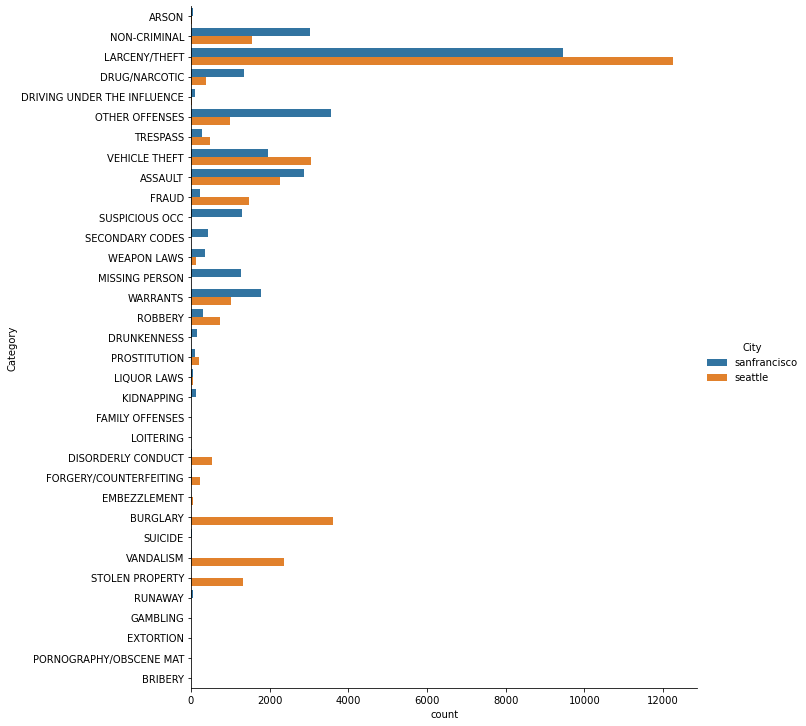

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.catplot (y = 'Category', hue='City', kind="count", data = dataset, height=10)

The plot above shows that `LARCENY/THEFT` is the most common category in both San Francisco and Seattle.

### Occurrence Analysis - Crimes by Hour

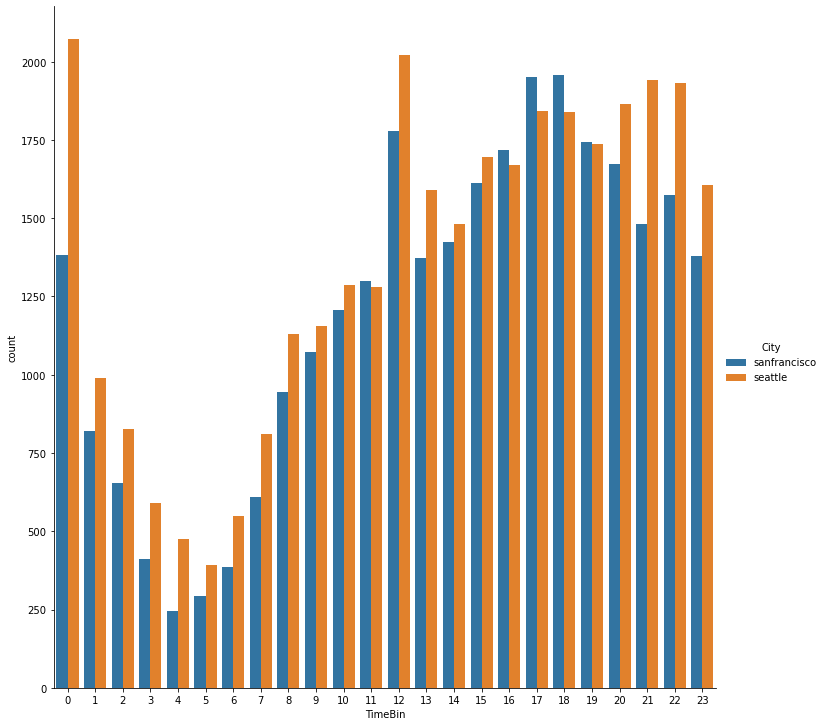

In [16]:
sns.catplot (x = 'TimeBin', hue='City', kind="count", data = dataset, height=10)

The graph above shows a greater occurrence of midnight crimes in Seattle than in San Francisco.

### Comparison between San Francisco and Seattle crime distribution

An interesting way to show the differences in crime distribution between the 2 cities is to use hierarchical clustering on normalized crime occurrences broken down by category. Taking advantage of the powerful visualization techniques of seaborn library, `clustermap` will be used, it uses hierarchical clustering to discover relationships between rows and columns in a DataFrame.

The first step is to prepare the data, creating a DataFrame where each row represents a category, and each column a different city. A few extra processing steps:

* If a crime category doesn't have an occurrence in both cities, it take it out. It wouldn't be meaningful to include it since comparing both cities is the objective.
* It's necessary to normalize the values accross rows so that crimes with very high occurrences like `LARCENY/THEFT` don't end up alone in a cluster and everything else in a separate cluster. The sum of each row should be 1.

In [17]:
gb = dataset.groupby("Category")
category_by_city = gb["City"].value_counts().unstack().fillna(0)
# filter out crimes which don't have an occurrence in both cities
category_by_city_nonnull = category_by_city[(category_by_city[SF] > 0) & (category_by_city[SEATTLE] > 0)]
print ("Crime categories not in both cities:")
print (category_by_city[(category_by_city[SF] == 0) | (category_by_city[SEATTLE] == 0)])
# normalize the distribution of crimes so that each rows adds up to 1
category_by_city_norm = category_by_city_nonnull.div(category_by_city_nonnull.sum(axis=1), axis=0)

category_by_city_norm.sample(n=5)

Crime categories not in both cities:
City             sanfrancisco  seattle
Category                              
BRIBERY                   1.0      0.0
DRUNKENNESS             147.0      0.0
EXTORTION                 7.0      0.0
FAMILY OFFENSES          10.0      0.0
GAMBLING                  1.0      0.0
KIDNAPPING              117.0      0.0
LOITERING                 3.0      0.0
MISSING PERSON         1266.0      0.0
SECONDARY CODES         442.0      0.0
SUICIDE                  14.0      0.0
SUSPICIOUS OCC         1300.0      0.0


City,sanfrancisco,seattle
Category,,
FORGERY/COUNTERFEITING,0.076271,0.923729
DRIVING UNDER THE INFLUENCE,0.746269,0.253731
LARCENY/THEFT,0.435759,0.564241
FRAUD,0.141108,0.858892
WARRANTS,0.635747,0.364253


`clustermap` will be plotted, using the `Blues` colormap for consistency:

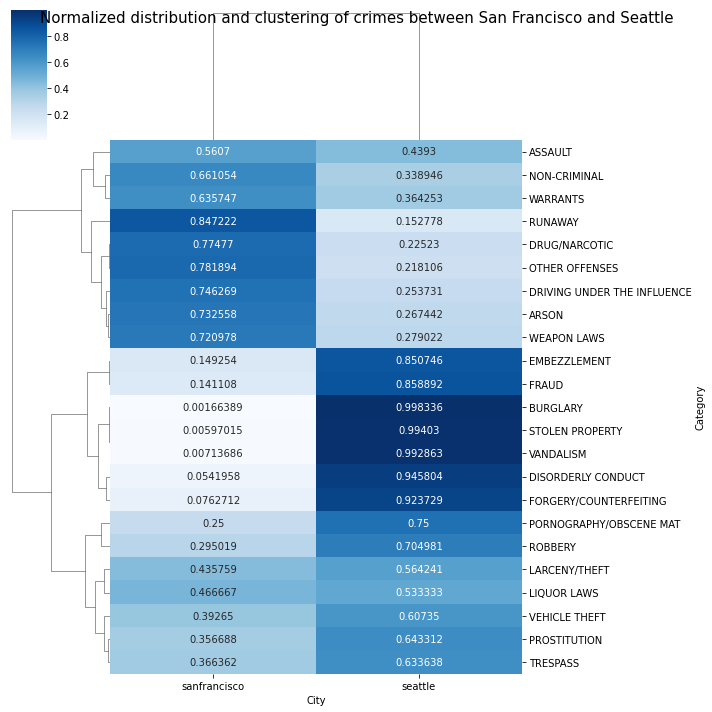

In [18]:
import seaborn as sns

g = sns.clustermap(category_by_city_norm, annot=True, cmap="Blues", fmt="g")
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
g.fig.suptitle("Normalized distribution and clustering of crimes between San Francisco and Seattle", size=15)
plt.show()

The `clustermap` has rearranged the order of the categories to exhibit the different clusters. Clearly there are 3 different clusters:

* A cluster where the proportion of occurrences is roughly the same between the 2 cities.
* A cluster where the proportion of occurrences is significantly higher in Seattle.
* A cluster where the proportion of occurrences is significantly higher in San Francisco.

Let's look the categories again:

* `ASSAULT`: 0.56 (SF) ~= 0.44 (Seattle)
* `DRUNKENNESS`: not in Seattle, probably due to the way we manually labelled the Seattle categories, or could already be labbeled by Seattle Policy Department under different categories.
* `LARCENY/THEFT`: 0.44 (SF) ~= 0.56 (Seattle)
* `PROSTITUTION`: 0.36 (SF) < 0.64 (Seattle)
* `ROBBERY`: 0.70 (SF) < 0.30 (Seattle)
* `VEHICLE THEFT`: 0.39 (SF) < 0.61 (Seattle)

`ASSAULT` and `LARCENY/THEFT` are the most frequent crime categories (see previous map), so it makes sense that they are roughly similar between the 2 cities because it is statistically significant.
For the other categories however they are far lower in San Francisco than in Seattle. This could happen due to:
* There are more crime entries in the initial datasets for Seattle than in San Francisco.
* When manually re-labelled the crime categories in Seattle, and might have inflated some categories numbers.

## Conclusion

In this analysis the following facts were discovered:

* Certain crime categories such as theft, vehicle theft and prostitution occur mostly in San Francisco, unlike drug/narcotics and weapons laws, occurring mainly in Seattle.
* Crime categories such as assault and larceny/theft are statistically significant.